## Thumnnails form PDFs

This notebooks shows some sample code for how to generate thumbnails form PDFs


In [1]:
from pdf2image import convert_from_path
from PIL import Image
import requests
from thumbs import scale_and_crop
import tempfile


## 1. Thumbails for book

Use `crop="smart"` to extract the most "interesting" part of the book cover (assume it's the first page of the PDF)

In [2]:
# Get a sample book
# book_url = 'https://goalkicker.com/MicrosoftSQLServerBook/MicrosoftSQLServerNotesForProfessionals.pdf'
book_url = 'https://goalkicker.com/BashBook/BashNotesForProfessionals.pdf'
book_path = 'sample_book.pdf'
response = requests.get(book_url)
assert response.status_code == 200
with open(book_path, 'wb') as pdf_file:
    pdf_file.write(response.content)


In [3]:
# Convert pages to PIL image objects
RESOLUTION = 100  # dpi
pages = convert_from_path(book_path, dpi=RESOLUTION, first_page=1, last_page=1)
page = pages[0]
# page

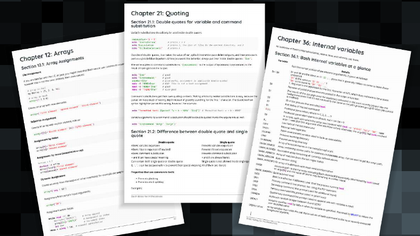

In [4]:
CONTENT_THUMB_SIZE = (420, 236)
book_thumb = scale_and_crop(page, CONTENT_THUMB_SIZE, crop="smart")
book_thumb

In [5]:
book_thumb.save('book_thumb.png')

In [6]:
!du -sh book_thumb.png

 96K	book_thumb.png


## 2. Thumbails for chapter

Use PIL to crop a chunk of 16:9 aspect ratio from the top of the PDF for that chapter 

In [7]:
# Get a sample chapter from book
chapter_url = 'https://studio.learningequality.org/content/storage/5/3/532e33860b629051964d1b8c5a8b34d9.pdf'
chapter_path = 'sample_chapter.pdf'
response = requests.get(chapter_url)
assert response.status_code == 200
with open(chapter_path, 'wb') as pdf_file:
    pdf_file.write(response.content)


In [8]:
# Convert pages to PIL image objects
RESOLUTION = 100  # dpi
pages = convert_from_path(chapter_path, dpi=RESOLUTION, first_page=1, last_page=1)
page = pages[0]
# page

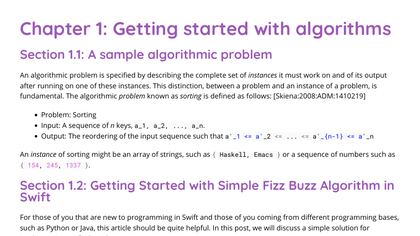

In [9]:
# crop just the top part
ASPECT_RATIO = 16.0/9.0             # Kolibri thumbnails are 16:9 
pagewidth, pageheight = page.size   # Get page dimensions 
desired_height = int(pagewidth/ASPECT_RATIO)
left = 0
upper = 0
right = pagewidth
lower = desired_height
thumb_large = page.crop( (left, upper, right, lower))


CONTENT_THUMB_SIZE = (420, 236)
chapter_thumb = scale_and_crop(thumb_large, CONTENT_THUMB_SIZE, crop="smart")
chapter_thumb

In [10]:
book_thumb.save('chapter_thumb.png')

In [11]:
!du -sh chapter_thumb.png

 96K	chapter_thumb.png
